# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [163]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

In [164]:
cities.sort()
print(cities)

['abalak', 'acahay', 'adrar', 'ahipara', 'airai', 'aitape', 'aklavik', 'aksay', 'albany', 'alexandria', 'alice springs', 'alindao', 'aljezur', 'almansa', 'alofi', 'alotau', 'alta gracia', 'amapa', 'ambon', 'ambulu', 'amderma', 'ancud', 'anqing', 'aras', 'arcata', 'ardakan', 'ario', 'ariquemes', 'arman', 'arona', 'arraial do cabo', 'asau', 'asmara', 'asosa', 'atasu', 'attawapiskat', 'atuona', 'auxerre', 'avarua', 'ayan', 'aykhal', 'babanusah', 'babina', 'bajil', 'bambari', 'bambous virieux', 'banda aceh', 'bandarbeyla', 'banon', 'bar harbor', 'barentsburg', 'bargal', 'barinas', 'barrow', 'basco', 'bathsheba', 'baturaja', 'belle fourche', 'belushya guba', 'bendigo', 'bengkulu', 'berdigestyakh', 'beringovskiy', 'berlevag', 'bethel', 'biak', 'bida', 'bilma', 'birao', 'birjand', 'blairmore', 'bluff', 'boende', 'bolungarvik', 'bonthe', 'borba', 'bouna', 'bowen', 'boyolangu', 'bredasdorp', 'bria', 'bulgan', 'bull savanna', 'burgeo', 'buritizeiro', 'burns lake', 'busselton', 'butaritari', 'byr

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls. Think: how do you do anything successively?
* Make sure each city in your dataset includes coordinates, country, max temperature, pressure, humidity and wind speed
* Use a try-except to handle errors (they will occur)
* Include a print log of each city as it'sbeing processed (with the city number and city name). City number is just going to count which city is being processed 


In [170]:
#requesting the data and putting the resulting dictionaries into a list
from datetime import datetime
api_key= 'a13759df887d2de294c2c7adef912758'
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a13759df887d2de294c2c7adef912758"
weather_list=[]
for city in cities:
    req = requests.get(base_url + f'&q={city}')
    json_data = req.json()
    if (json_data['cod'] == 200):
        weather_list.append(json_data)
    else:
        pass
    #creating a log for processing
    print(len(weather_list), '.', city.capitalize(), ', processed:', datetime.fromtimestamp(time.time()))
#transforming the list of dictionaries into a dataframe
weather_df=pd.json_normalize(weather_list)
#printing the dataframe
weather_df

1 . Abalak , processed: 2022-05-21 23:18:11.568818
2 . Acahay , processed: 2022-05-21 23:18:11.605162
3 . Adrar , processed: 2022-05-21 23:18:11.640814
4 . Ahipara , processed: 2022-05-21 23:18:11.712376
5 . Airai , processed: 2022-05-21 23:18:11.970979
6 . Aitape , processed: 2022-05-21 23:18:12.008842
7 . Aklavik , processed: 2022-05-21 23:18:12.046138
8 . Aksay , processed: 2022-05-21 23:18:12.083646
9 . Albany , processed: 2022-05-21 23:18:12.118794
10 . Alexandria , processed: 2022-05-21 23:18:12.163568
11 . Alice springs , processed: 2022-05-21 23:18:12.203864
12 . Alindao , processed: 2022-05-21 23:18:12.238049
13 . Aljezur , processed: 2022-05-21 23:18:12.274938
14 . Almansa , processed: 2022-05-21 23:18:12.313264
15 . Alofi , processed: 2022-05-21 23:18:12.348710
15 . Alotau , processed: 2022-05-21 23:18:12.389306
16 . Alta gracia , processed: 2022-05-21 23:18:12.424592
17 . Amapa , processed: 2022-05-21 23:18:12.458722
18 . Ambon , processed: 2022-05-21 23:18:12.529287
19 . A

146 . Faya , processed: 2022-05-21 23:18:20.298839
146 . Fillira , processed: 2022-05-21 23:18:20.406469
147 . Flums , processed: 2022-05-21 23:18:20.440605
148 . Fortuna , processed: 2022-05-21 23:18:20.478369
149 . Fukuma , processed: 2022-05-21 23:18:20.524664
150 . Gat , processed: 2022-05-21 23:18:20.805820
151 . Gazojak , processed: 2022-05-21 23:18:21.687726
152 . Georgetown , processed: 2022-05-21 23:18:21.734804
153 . Geraldton , processed: 2022-05-21 23:18:21.774845
154 . Gizo , processed: 2022-05-21 23:18:21.814796
155 . Goderich , processed: 2022-05-21 23:18:21.869084
156 . Gornopravdinsk , processed: 2022-05-21 23:18:21.909538
157 . Graaff-reinet , processed: 2022-05-21 23:18:21.948817
158 . Grand gaube , processed: 2022-05-21 23:18:21.991361
159 . Grand island , processed: 2022-05-21 23:18:22.033952
159 . Grand river south east , processed: 2022-05-21 23:18:22.075841
160 . Grenaa , processed: 2022-05-21 23:18:22.111450
161 . Grindavik , processed: 2022-05-21 23:18:22.1451

281 . Majene , processed: 2022-05-21 23:18:32.990470
282 . Makakilo city , processed: 2022-05-21 23:18:33.027427
283 . Malakal , processed: 2022-05-21 23:18:33.282010
284 . Maldonado , processed: 2022-05-21 23:18:33.321436
285 . Mamallapuram , processed: 2022-05-21 23:18:33.360854
286 . Mana , processed: 2022-05-21 23:18:33.412880
287 . Manama , processed: 2022-05-21 23:18:33.452963
288 . Manaquiri , processed: 2022-05-21 23:18:33.492707
289 . Manga , processed: 2022-05-21 23:18:33.534395
290 . Maningrida , processed: 2022-05-21 23:18:33.574612
291 . Manthani , processed: 2022-05-21 23:18:33.620780
292 . Mar del plata , processed: 2022-05-21 23:18:33.655687
293 . Maragogi , processed: 2022-05-21 23:18:33.699613
294 . Marawi , processed: 2022-05-21 23:18:33.753238
295 . Marechal candido rondon , processed: 2022-05-21 23:18:33.805949
296 . Martinez , processed: 2022-05-21 23:18:33.852029
297 . Marzuq , processed: 2022-05-21 23:18:33.974388
298 . Masvingo , processed: 2022-05-21 23:18:34.

420 . Roald , processed: 2022-05-21 23:18:42.612420
421 . Robertsport , processed: 2022-05-21 23:18:42.648086
422 . Rocha , processed: 2022-05-21 23:18:42.683098
423 . Roma , processed: 2022-05-21 23:18:42.717351
424 . Rundu , processed: 2022-05-21 23:18:42.754115
425 . Ryazanovskiy , processed: 2022-05-21 23:18:42.789620
426 . Saint anthony , processed: 2022-05-21 23:18:42.829654
427 . Saint george , processed: 2022-05-21 23:18:42.868065
428 . Saint-philippe , processed: 2022-05-21 23:18:42.903883
429 . Saint-pierre , processed: 2022-05-21 23:18:42.941054
430 . Saldanha , processed: 2022-05-21 23:18:42.979107
430 . Saleaula , processed: 2022-05-21 23:18:43.059048
431 . Samarai , processed: 2022-05-21 23:18:43.094995
431 . Samusu , processed: 2022-05-21 23:18:43.137543
432 . San ignacio , processed: 2022-05-21 23:18:43.173664
433 . San jeronimo , processed: 2022-05-21 23:18:43.208856
434 . San patricio , processed: 2022-05-21 23:18:43.244798
435 . San quintin , processed: 2022-05-21 23

,weather,base,visibility,dt,timezone,id,name,cod,coord.lon,coord.lat,...,wind.gust,clouds.all,sys.country,sys.sunrise,sys.sunset,sys.type,sys.id,rain.1h,rain.3h,snow.1h
0,"[{'id': 804, 'main': 'Clouds', 'description': ...",stations,10000,1653189129,18000,1512223,Abalak,200,68.5944,58.1286,...,19.30,100,RU,1653173254,1653235036,NaN,NaN,NaN,NaN,NaN
1,"[{'id': 802, 'main': 'Clouds', 'description': ...",stations,10000,1653189143,-14400,3439482,Acahay,200,-57.1500,-25.9167,...,3.83,28,PY,1653128554,1653167287,NaN,NaN,NaN,NaN,NaN
2,"[{'id': 800, 'main': 'Clear', 'description': '...",stations,10000,1653189144,0,2381972,Adrar,200,-10.0711,20.5022,...,6.85,0,MR,1653199280,1653246771,NaN,NaN,NaN,NaN,NaN
3,"[{'id': 804, 'main': 'Clouds', 'description': ...",stations,10000,1653189144,43200,2194098,Ahipara,200,173.1667,-35.1667,...,17.92,100,NZ,1653160799,1653197293,NaN,NaN,NaN,NaN,NaN
4,"[{'id': 801, 'main': 'Clouds', 'description': ...",stations,10000,1653189144,32400,1651810,Airai,200,125.4092,-8.9266,...,8.03,23,TL,1653169493,1653211524,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,"[{'id': 803, 'main': 'Clouds', 'description': ...",stations,10000,1653189306,34200,6355222,Yulara,200,130.9889,-25.2406,...,9.01,51,AU,1653169742,1653208597,NaN,NaN,NaN,NaN,NaN
545,"[{'id': 800, 'main': 'Clear', 'description': '...",stations,10000,1653189306,28800,1528998,Yumen,200,97.2000,40.2833,...,27.60,0,CN,1653170994,1653223564,NaN,NaN,NaN,NaN,NaN
546,"[{'id': 804, 'main': 'Clouds', 'description': ...",stations,10000,1653189306,28800,2033196,Zhangjiakou,200,114.8794,40.8100,...,4.16,98,CN,1653166665,1653219407,NaN,NaN,NaN,NaN,NaN
547,"[{'id': 803, 'main': 'Clouds', 'description': ...",stations,10000,1653189307,28800,1785036,Zhangye,200,100.4517,38.9342,...,5.21,75,CN,1653170434,1653222564,NaN,NaN,NaN,NaN,NaN


In [168]:
#getting rid of rows which generated errors
#weather_df = weather_df[weather_df.cod != "404"]
#deleting lines with no data
#weather_df.index=range(weather_df.shape[0])
#weather_df

In [171]:
#selecting columns which contain quantitative data for all of the cities listed
weather_df_narrow=weather_df[["name", "sys.country", "dt", "visibility", "coord.lon", "coord.lat", "main.temp", "main.feels_like", "main.temp_min", "main.temp_max", "main.pressure", "main.humidity", "wind.speed", "wind.deg", "clouds.all"]]

weather_df_narrow.head()

,name,sys.country,dt,visibility,coord.lon,coord.lat,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,wind.speed,wind.deg,clouds.all
0,Abalak,RU,1653189129,10000,68.5944,58.1286,51.13,49.48,51.13,51.13,993,75,10.71,199,100
1,Acahay,PY,1653189143,10000,-57.1500,-25.9167,52.21,51.37,52.21,52.21,1021,90,3.98,80,28
2,Adrar,MR,1653189144,10000,-10.0711,20.5022,87.75,84.06,87.75,87.75,1008,10,6.11,98,0
3,Ahipara,NZ,1653189144,10000,173.1667,-35.1667,62.94,62.08,62.94,62.94,1016,67,12.21,236,100
4,Airai,TL,1653189144,10000,125.4092,-8.9266,74.32,73.65,74.32,74.32,1011,47,4.59,129,23


### Convert Raw Data to DataFrame
* Display the DataFrame
* Export the city data into a .csv. Open it up in excel or another program to make sure it looks as expected

In [183]:
#deleting lines without data
weather_df_narrow.index=range(weather_df_narrow.shape[0])
#renaming the column titles so that they look less geeky
colnew=['City', 'Country', 'Date', 'Visibility', 'Lon', 'Lat', 'Main Temp', 'Temp Feels Like', 'Temp Min','Temp Max','Pressure','Humidity','Wind Speed','Wind Degree','Cloudiness']
weather_df_narrow2=weather_df_narrow.rename(columns=dict(zip(list(weather_df_narrow), colnew)))
#write to csv
weather_df_narrow2.to_csv('weather_data_narrowed.csv')
weather_df_narrow2

,City,Country,Date,Visibility,Lon,Lat,Main Temp,Temp Feels Like,Temp Min,Temp Max,Pressure,Humidity,Wind Speed,Wind Degree,Cloudiness
0,Abalak,RU,1653189129,10000,68.5944,58.1286,51.13,49.48,51.13,51.13,993,75,10.71,199,100
1,Acahay,PY,1653189143,10000,-57.1500,-25.9167,52.21,51.37,52.21,52.21,1021,90,3.98,80,28
2,Adrar,MR,1653189144,10000,-10.0711,20.5022,87.75,84.06,87.75,87.75,1008,10,6.11,98,0
3,Ahipara,NZ,1653189144,10000,173.1667,-35.1667,62.94,62.08,62.94,62.94,1016,67,12.21,236,100
4,Airai,TL,1653189144,10000,125.4092,-8.9266,74.32,73.65,74.32,74.32,1011,47,4.59,129,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,Yulara,AU,1653189306,10000,130.9889,-25.2406,68.16,66.13,68.16,68.16,1019,31,8.72,80,51
545,Yumen,CN,1653189306,10000,97.2000,40.2833,77.20,75.33,77.20,77.20,1001,15,21.41,84,0
546,Zhangjiakou,CN,1653189306,10000,114.8794,40.8100,82.33,80.01,82.33,82.33,1006,18,3.71,203,98
547,Zhangye,CN,1653189307,10000,100.4517,38.9342,78.04,76.35,78.04,78.04,1001,17,2.30,350,75


In [184]:
weather_df_narrow2.count()

City               549
Country            549
Date               549
Visibility         549
Lon                549
Lat                549
Main Temp          549
Temp Feels Like    549
Temp Min           549
Temp Max           549
Pressure           549
Humidity           549
Wind Speed         549
Wind Degree        549
Cloudiness         549
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* Save the plotted figures as .pngs and embed those pngs in your readme file.

#### Latitude vs. Temperature Plot

In [185]:
def plot_scatter(axes, x, y, m_shape, m_size, m_width, m_edge, color1, xlabel, xfont, ylabel, yfont, plottitle, titlefont, bordercolor):
    axes.scatter(x,y, marker=m_shape, s=m_size, linewidths=m_width, edgecolors=m_edge, color = color1)
    axes.set_xlabel(xlabel, fontsize=xfont)
    axes.set_ylabel(ylabel, fontsize=yfont)
    axes.set_title(plottitle, fontsize=titlefont)
    plt.rcParams["axes.edgecolor"] = bordercolor
    plt.show()

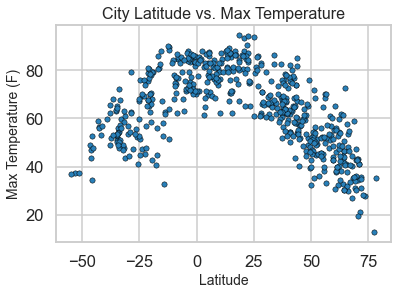

In [186]:
fig, ax = plt.subplots()
plot_scatter(ax, weather_df_narrow2["Lat"], weather_df_narrow2["Temp Max"], "o", 28, 0.5, "black", "#2980B9", "Latitude", 14, "Max Temperature (F)", 14,  "City Latitude vs. Max Temperature", 16, "black")


#### Latitude vs. Humidity Plot

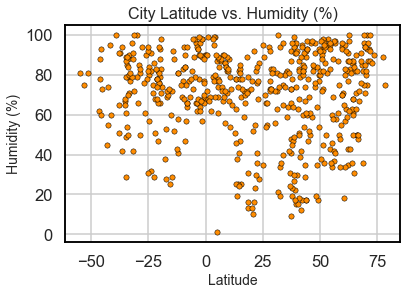

In [187]:
fig, ax = plt.subplots()
plot_scatter(ax, weather_df_narrow2["Lat"], weather_df_narrow2["Humidity"], "o", 28, 0.5, "black", "#FF8C00", "Latitude", 14, "Humidity (%)", 14,  "City Latitude vs. Humidity (%)", 16, "black")


#### Latitude vs. Cloudiness Plot

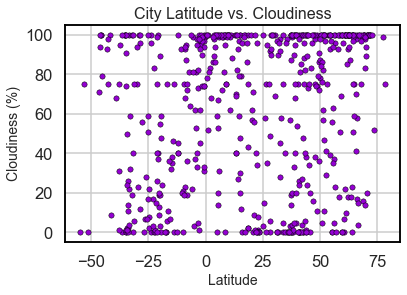

In [188]:
fig, ax = plt.subplots()
plot_scatter(ax, weather_df_narrow2["Lat"], weather_df_narrow2["Cloudiness"], "o", 28, 0.5, "black", "#9400D3", "Latitude", 14, "Cloudiness (%)", 14,  "City Latitude vs. Cloudiness", 16, "black")

#### Latitude vs. Wind Speed Plot

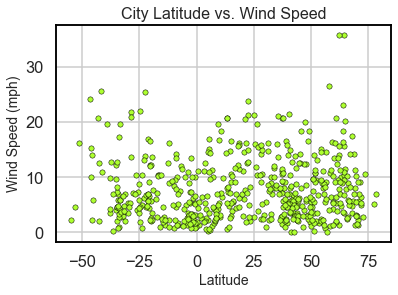

In [177]:
fig, ax = plt.subplots()
plot_scatter(ax, weather_df_narrow2["Lat"], weather_df_narrow2["Wind Speed"], "o", 28, 0.5, "black", "#ADFF2F", "Latitude", 14, "Wind Speed (mph)", 14,  "City Latitude vs. Wind Speed", 16, "black")

In [189]:
def plot_scatter_hue(axes, x, y, z, m_shape, m_size, m_width, m_edge, xlabel, xfont, ylabel, yfont, plottitle, titlefont, bordercolor):
    axes.scatter(x,y, marker=m_shape, s=m_size, linewidths=m_width, edgecolors=m_edge, c=z, cmap='gist_rainbow')
    axes.set_xlabel(xlabel, fontsize=xfont)
    axes.set_ylabel(ylabel, fontsize=yfont)
    axes.set_title(plottitle, fontsize=titlefont)
    plt.rcParams["axes.edgecolor"] = bordercolor
    plt.show()

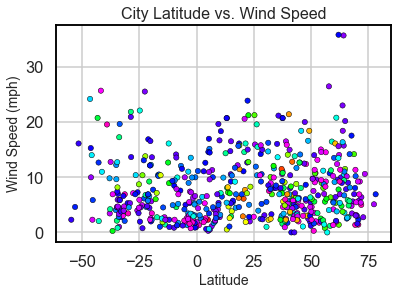

In [190]:
fig, ax = plt.subplots()
plot_scatter_hue(ax, weather_df_narrow2["Lat"], weather_df_narrow2["Wind Speed"], weather_df_narrow2["Humidity"], "o", 28, 0.5, "black", "Latitude", 14, "Wind Speed (mph)", 14,  "City Latitude vs. Wind Speed", 16, "black")

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

In [191]:
def sns_scatter_plot(df, xdata, ydata, fontsize, scatter_color, edge_color, width, plottitle, x_label, y_label):
    g=sns.scatterplot(x=xdata, y=ydata, data = df, s=fontsize, color=scatter_color, edgecolor=edge_color, linewidth=width)
    g.set_title(plottitle)
    g.set(xlabel=x_label, ylabel=y_label)
    sns.set_context('talk')
    sns.set_style('whitegrid')

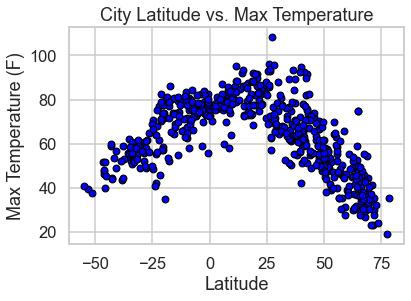

In [161]:
sns_scatter_plot(weather_df_narrow2, "Lat", "Temp Max", 45, "blue", "black", 1.2, "City Latitude vs. Max Temperature", "Latitude", "Max Temperature (F)")

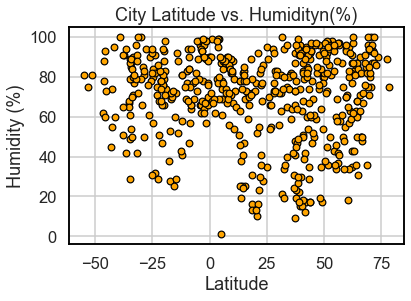

In [192]:
sns_scatter_plot(weather_df_narrow2, "Lat", "Humidity", 45, "orange", "black", 1.2, "City Latitude vs. Humidityn(%)", "Latitude", "Humidity (%)")

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

In [ ]:
# The temperature increases until the latitude reaches zero (equator) tehn decreases again
# There are relatively few cities with negative latitude and low humidity (south hemisphere is generally high humidity)
# Cities with very high wind speeds are either on the far north or the far south

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 